# UAS

> Diah Kamalia - 200411100061

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

## Timestamp

In [ ]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## Read Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diahkamalia/DataMining1/main/TLKM.JK.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,4060.0,4080.0,4030.0,4060.0,3896.035889,94848800
1,2022-06-16,4120.0,4120.0,4030.0,4040.0,3876.843506,96042200
2,2022-06-17,4010.0,4120.0,3980.0,4120.0,3953.612793,169375800
3,2022-06-20,4050.0,4060.0,4000.0,4040.0,3876.843506,82101200
4,2022-06-21,4060.0,4120.0,4030.0,4110.0,3944.016602,77489000
...,...,...,...,...,...,...,...
242,2023-06-08,4160.0,4180.0,4120.0,4170.0,4001.593506,78989700
243,2023-06-09,4170.0,4170.0,4140.0,4150.0,3982.401123,83014700
244,2023-06-12,4040.0,4050.0,4010.0,4050.0,4050.000000,94687300
245,2023-06-13,4040.0,4060.0,4030.0,4030.0,4030.000000,69609000


## Jumlah Data

In [ ]:
data.count()

Date         247
Open         247
High         247
Low          247
Close        247
Adj Close    247
Volume       247
dtype: int64

## Set Index Dates to Data

In [ ]:
# data["Month"] = pd.to_datetime(data.Date, dayfirst=True)
data.set_index("Date", inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-15,4060.0,4080.0,4030.0,4060.0,3896.035889,94848800
2022-06-16,4120.0,4120.0,4030.0,4040.0,3876.843506,96042200
2022-06-17,4010.0,4120.0,3980.0,4120.0,3953.612793,169375800
2022-06-20,4050.0,4060.0,4000.0,4040.0,3876.843506,82101200
2022-06-21,4060.0,4120.0,4030.0,4110.0,3944.016602,77489000
...,...,...,...,...,...,...
2023-06-08,4160.0,4180.0,4120.0,4170.0,4001.593506,78989700
2023-06-09,4170.0,4170.0,4140.0,4150.0,3982.401123,83014700
2023-06-12,4040.0,4050.0,4010.0,4050.0,4050.000000,94687300


## Prepocessing Data

### Timestamp

In [ ]:
n_steps = 5
X, y = split_sequence(data['Open'], n_steps)

### Ukuran Data dan Target

In [ ]:
X.shape, y.shape

((242, 5), (242,))

### Normalisasi

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.41818182, 0.47272727, 0.37272727, 0.40909091, 0.41818182],
       [0.47272727, 0.37272727, 0.40909091, 0.41818182, 0.44545455],
       [0.37272727, 0.40909091, 0.41818182, 0.44545455, 0.39090909],
       ...,
       [0.41818182, 0.44545455, 0.45454545, 0.50909091, 0.51818182],
       [0.44545455, 0.45454545, 0.50909091, 0.51818182, 0.4       ],
       [0.45454545, 0.50909091, 0.51818182, 0.4       , 0.4       ]])

### Split Data Training dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

## Modelling

> Model yang digunakan adalah NAIVE BAYES

### Training

In [ ]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

### Test

In [ ]:
y_pred=gNB.predict(X_train)

### Plot hasil prediksi dan data actual

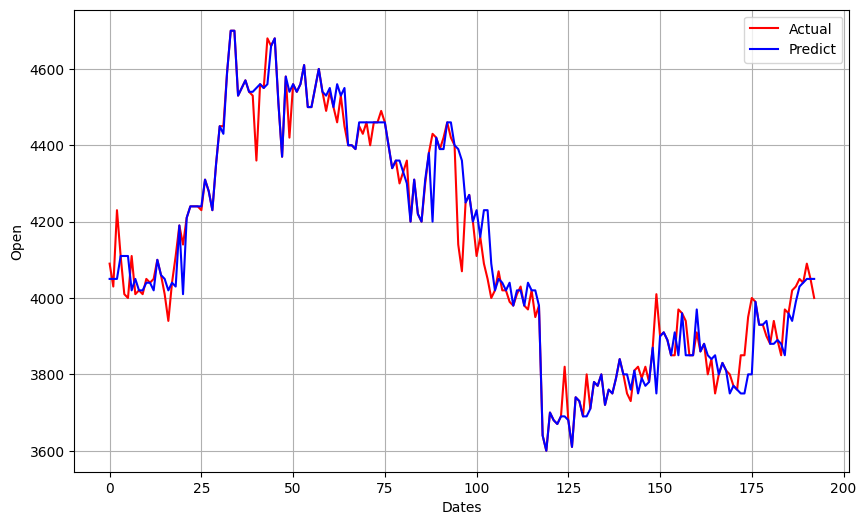

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(y_train, 'red', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()

## Evaluasi

### MAPE

In [ ]:
print(f'mape = {mean_absolute_percentage_error(y_train, y_pred)}')

mape = 0.007391262266805843


### Akurasi

In [ ]:
acc = (1 - mean_absolute_percentage_error(y_train, y_pred)) * 100
acc

99.26087377331942